# Step 1 - Getting the data from 'Glassdoor' website

### _Purpose_:
## We aim to collect job data from the 'Glassdoor' website. However, we observed that the website restricts access to only 900 jobs per keyword, limiting our ability to gather comprehensive data. To overcome this limitation, we devised a solution by creating a list of keywords specific to each sector of interest.

### _Approach_:
## 1. We will utilize a custom scraper built with Selenium to automate the data collection process from 'Glassdoor.'
## 2. To ensure a broad coverage of job postings, we have curated a list of keywords that correspond to specific sectors.
## 3. By iterating through each keyword, we can gather a substantial amount of job data for analysis.

### _Benefits_:
## - Increased data availability: By using a diverse set of keywords, we can expand our dataset beyond the 900-job limit imposed by 'Glassdoor'.
## - Sector-specific insights: The use of sector-specific keywords enables us to focus our analysis on particular industries, facilitating deeper understanding and targeted recommendations.

### _Note_:
## The scraper and keyword list will be called from this main file to streamline the data collection process.


In [ ]:
import Glass_Door_Scraper_var0 as var0

NUM_JOBS = 100
PATH_DRIVER = "C:\Program Files (x86)/chromedriver"
MAX_SLEEP_TIME = .7


def main_scraper():

    # Software Engineer
    list_keywords_SE = [
        'Artificial Intelligence', 'Machine Learning engineer',
        'Data engineering'
        'DevOps', 'Cybersecurity', 'Data science and analytics', 'Augmented Reality', 'Robotics', 'Web development',
        'Internet of Things', 'Financial technology', 'HealthTech', 'E-commerce',
        'Enterprise software', 'Education technology', 'Social media and networking engineer']

    # Data Science
    list_keywords_DS = [
        'Data tScientist', 'Data Analyst', 'Machine Learning Engineer',
        'Data Engineer', 'Business Intelligence Analyst', 'Data Architect',
        'Statistician', 'Quantitative Analyst', 'Data Product Manager',
        'Research Scienist'
    ]

    # QA
    list_keywords_QA = [
        'Quality Assurance Analyst', 'Software Tester', 'QA Engineer', 'Automation Tester',
        'Test Lead', 'Test Manager', 'Performance Tester', 'Security Tester', 'User Acceptance Tester',
        'Test Automation Engineer', 'Mobile Tester', 'Game Tester', 'Test Architect',
        'Regression Tester', 'Load Tester', 'Accessibility Tester', 'Functional Tester',
        'Usability Tester', 'Localization Tester', 'Database Tester', 'API Tester',
        'Penetration Tester', 'Compliance Tester', 'Test Coordinator', 'Test Consultant',
        'Test Strategist', 'Test Trainer', 'Test Process Engineer', 'Test Data Analyst', 'Test Environment Manager']

    # Machin learning
    list_keywords_ML = ['Machine Learning Engineer', 'AI Researcher', 'Computer Vision Engineer',
                        'Natural Language Processing (NLP) Engineer',
                        'Deep Learning Engineer', 'Robotics Engineer', 'Recommender Systems Engineer',
                        'Data Analyst', 'Business Intelligence Analyst', 'Fraud Detection Analyst',
                        'Image Recognition Engineer', 'Speech Recognition Engineer', 'Predictive Analytics Specialist',
                        'Autonomous Vehicle Engineer', 'Healthcare Data Scientist', 'Financial Analyst (ML)',
                        'Social Media Analyst', 'Sentiment Analysis Specialist', 'Text Mining Expert',
                        'Data Mining Engineer', 'Pattern Recognition Engineer', 'Anomaly Detection Specialist',
                        'Virtual Assistant Developer', 'Chatbot Developer', 'AI Consultant',
                        'Predictive Maintenance Engineer', 'Energy Analyst (ML)',
                        'Manufacturing Optimization Specialist', 'Agriculture Analytics Specialist']

    # Game Development
    list_keywords_GD = ['Game Designer', 'Game Programmer', 'Game Artist', 'Game Animator', 'Game Sound Designer',
                        'Game Tester', 'Game Producer', 'Game Writer', 'Game Level Designer', 'Game UI/UX Designer',
                        'Game Monetization Specialist', 'Game Quality Assurance Tester', 'Game Engine Developer',
                        'Game Localization Specialist', 'Gameplay Programmer', 'Gameplay Designer',
                        # VR & AR
                        'VR Developer', 'AR Developer', 'VR/AR Designer', 'VR/AR Artist', 'VR/AR Engineer',
                        'VR/AR Content Creator', 'VR/AR UX Designer', 'VR/AR Software Engineer'


                        # Computer Graphics
                                                                      'Graphics Programmer',
                        'Graphics Software Engineer', 'Shader Developer', 'Rendering Engineer',
                        'Computer Vision Engineer', '3D Modeler', 'Texture Artist', 'Lighting Artist',
                        'Character Artist',
                        'Environment Artist', 'Rigging Artist'

                        # Simulation and Training
                                              'Simulation Developer', 'Training Developer', 'Simulation Engineer',
                        'Training Specialist',
                        'Simulation Programmer', 'Training Coordinator', 'Simulation Designer', 'Training Instructor'


                        # Serious Games
                                                                                                'Serious Games Developer',
                        'Educational Game Developer', 'Healthcare Game Developer',
                        'Military Training Game Developer', 'Corporate Training Game Developer',
                        'Government Simulation Developer'

                        # Interactive Media
                        'Interactive Media Developer', 'Interactive Media Designer', 'Interactive Media Artist',
                        'Interactive Media Programmer', 'Interactive Storyteller', 'Interactive Experience Designer'

                        # Game Analytics
                                                                                   'Game Data Analyst',
                        'Game Data Scientist', 'Game Analytics Specialist', 'Game User Researcher',
                        'Game Market Research Analyst', 'Game Business Intelligence Analyst']

    # calling the scraper with different category
    scrape_jobs_and_save(list_keywords_ML, "machine learning", "ML")
    scrape_jobs_and_save(list_keywords_SE, "software engineer", "SE")
    scrape_jobs_and_save(list_keywords_QA, "QA", "QA")
    scrape_jobs_and_save(list_keywords_GD, "game development", "GD")
    scrape_jobs_and_save(list_keywords_DS, "data scientist", "DS")


def scrape_jobs_and_save(list_keywords, category, file_prefix):
    for i, keyword in enumerate(list_keywords):
        df = var0.get_jobs(keyword, NUM_JOBS, PATH_DRIVER, MAX_SLEEP_TIME)  # call to scraper
        df_clean = dc.data_cleaning(df)  # first clean: calculate the salary, fixing the location and more
        df_clean.to_csv(f"data files/{category}/{file_prefix}_{i}_{keyword}.csv", index=False)


# The Scraper Code
### _Purpose_:
## The purpose of this cell is to implement the scraper code that retrieves job data from the 'Glassdoor' website. However, we encountered significant challenges due to the complex structure of the website's job listings.

### _Challenges Faced_:
## The 'Glassdoor' website organizes job listings in a nested list format, which presented difficulties in extracting the desired information. The job details were nested within multiple layers of lists and pagination.

### Approach:
## To overcome the complexities of the website's structure, we devised a step-by-step approach for scraping the data:
## 1. Identify and locate the relevant HTML elements containing the job information.
## 2. Traverse through the nested lists and pages to access each job listing.
## 3. Extract the necessary details such as job title, company name, location, salary, and other relevant information.
## 4. Store the extracted data in a suitable data structure or format for further analysis.

### _Benefits_:
## By successfully implementing the scraper code, we can gather comprehensive job data despite the website's intricate structure. This allows us to extract valuable insights and patterns from a large volume of job listings.

In [ ]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException, TimeoutException
from datetime import datetime
from selenium import webdriver
import Extract_from_text as ets
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import WebDriverException

def get_jobs(keyword, num_jobs, path, slp_time):
    counter_break = 0

    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")

    driver = webdriver.Chrome(executable_path=path, options=options)
    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword=" \
          + keyword + "&sc.keyword=" \
          + keyword + "&locT=&locId=&jobType="
    driver.get(url)
    jobs = []

    wait = WebDriverWait(driver, slp_time)  # Wait for a maximum of 3 seconds


    try:
        driver.find_element_by_class_name("selected").click()
        print('#  Process Start Successfully  #')
    except ElementClickInterceptedException:
        pass


    try:
        job_buttons = driver.find_elements_by_css_selector("a.jobLink") #[-1]  # holding 30 'a' tags
        job_buttons[0].click()
        print(job_buttons[0])
        print("Clicked on job button successfully!")
    except Exception as e:
        print(e)


    try:
        close_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '[alt="Close"]')))
        close_button.click()  # Clicking the X button
        print('Close button clicked#2\n')  # AGAIN!!
    except TimeoutException:
        print('Close button DID NOT clicked!#2')
        pass


    try:
        total_jobs_locator = (By.XPATH, '//*[@id="MainCol"]/div[1]/div[1]/div/div/h1')
        num_of_total_jobs = wait.until(EC.visibility_of_element_located(total_jobs_locator)).text.replace(f" {keyword.lower()} Jobs", "")
        JOBS = int(num_of_total_jobs)
        if JOBS < num_jobs:
            num_jobs = JOBS
        print(f'Num of total jobs: {num_of_total_jobs}')
    except WebDriverException as e:
        print(e, "e1")
        return "Break"

    num_of_job_in_page = 0  # In every page there has 30 jobs
    currentPage = 0
    j = int(1)  # for creating a files

    try:
        print(currentPage)
        next_page_locator = (By.CSS_SELECTOR, '[alt="next-icon"]')
        next_page_element = wait.until(EC.element_to_be_clickable(next_page_locator))
        next_page_element.click()
    except NoSuchElementException:
        df = pd.DataFrame(jobs)
        return df
    except Exception as e:
        pass

    page_counter = 0
    while num_jobs > len(jobs):
        print("Entering page number:", currentPage + 1)
        page_counter += 1
        if page_counter == 34:
            df = pd.DataFrame(jobs)
            return df

        # Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException as e:
            pass

        time.sleep(3)
        list_elements = WebDriverWait(driver, 3).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'ul.hover li.react-job-listing')))


        for i, element in enumerate(list_elements):

            # Check if the number of jobs that collected is below the number we want or below the number of the total jobs
            if len(jobs) >= num_jobs:
                print(f"Progress stop because the number of jobs in the website is over :)"
                      f"\nNumber of jobs in the website:{num_of_total_jobs} Number of jobs scraped:{len(jobs)}")
                break

            if num_of_job_in_page == 30:  # here we will stop and move to the next page
                break

            try:
                div_element = element.find_element(By.TAG_NAME, 'div')
                job_button = div_element.find_element(By.TAG_NAME, 'a')
                job_button.click()
            except Exception as e:
                pass


            if i % 1 == 0:  # because each post has 3 links
                now = datetime.now()  # for testing
                is_remote = False
                num_of_job_in_page += 1  # 1/30

                print(f"\nProgress: {len(jobs) + 1}/{num_jobs} in page number: {currentPage + 1}")

                try:
                    job_button.click()  # Click on the next post in the list
                except Exception as e:
                    counter_break += 1
                    if counter_break == 50:
                        print(f"Process stop before reaching the target of jobs {len(jobs)}/{num_jobs}")
                        df = pd.DataFrame(jobs)
                        return df
                    else:
                        pass

                try:
                    show_more_button_locator = (By.XPATH, '//*[@id="JobDescriptionContainer"]/div[2]')
                    show_more_button = wait.until(EC.element_to_be_clickable(show_more_button_locator))
                    show_more_button.click()

                    try:
                        job_description_locator = (By.XPATH, '//*[@id="JobDescriptionContainer"]')
                        job_description = wait.until(EC.visibility_of_element_located(job_description_locator))
                        text = job_description.text

                        years_of_experience = ets.nlp_for_years_of_experience(text)
                        education = ets.extract_education(text)
                        position = ets.extract_position_level(text)

                        doc = False
                        if doc:
                            with open(f"raw text/row_text_{keyword}{j}.txt",
                                      'w') as f:  # for testing the 'extract' functions
                                j += 1
                                f.write(text)
                                f.write(
                                    f"\n\n\nTesting regine:"
                                    f"\nExperience: {years_of_experience}"
                                    f"\nEducation: {education}"
                                    f"\n Time of Scrape: {now}")

                    except Exception as e:
                        years_of_experience = -1
                        education = -1
                        position = -1

                except Exception as e:
                    years_of_experience = -1
                    education = -1
                    position = -1

                try:
                    company_name_locator = (By.XPATH, '//div[@class="css-87uc0g e1tk4kwz1"]')
                    company_name_element = wait.until(EC.visibility_of_element_located(company_name_locator))
                    company_name = company_name_element.text

                except:
                    company_name = int(-1)

                try:
                    job_title_locator = (By.CSS_SELECTOR, "div[data-test='jobTitle']")
                    job_title_element = wait.until(EC.visibility_of_element_located(job_title_locator))
                    job_title = job_title_element.text
                except:
                    job_title = int(-1)

                try:
                    location_locator = (By.CSS_SELECTOR, "div[data-test='location']")
                    location_element = wait.until(EC.visibility_of_element_located(location_locator))
                    location = location_element.text
                    if "Remote" in location:
                        is_remote = True
                except:
                    location = int(-1)


                try:
                    job_rating_locator = (By.CSS_SELECTOR, "span[data-test='detailRating']")
                    job_rating_element = wait.until(EC.visibility_of_element_located(job_rating_locator))
                    job_rating = job_rating_element.text
                except:
                    job_rating = int(-1)

                try:
                    rating_elements_locator = (By.CSS_SELECTOR, "span.css-a7hxlj.erz4gkm1")
                    rating_elements = wait.until(EC.presence_of_all_elements_located(rating_elements_locator))

                    career_opportunities = rating_elements[1].text
                    comp_and_benefits = rating_elements[3].text
                    culture_and_values = rating_elements[5].text
                    senior_management = rating_elements[7].text
                    work_life_balance = rating_elements[9].text

                except Exception as e:
                    career_opportunities = comp_and_benefits = culture_and_values = senior_management = work_life_balance = int(-1)

                try:
                    salaries_locator = (By.XPATH, '//div[@class="css-1bluz6i e2u4hf13"]')
                    salaries_element = wait.until(EC.visibility_of_element_located(salaries_locator))
                    salaries = salaries_element.text
                except TimeoutException:
                    salaries = int(-1)
                    pass

                try:
                    company_overview_button_locator = (By.CSS_SELECTOR, 'h2.css-1r0ltbv.e9b8rvy0')
                    company_overview_button = wait.until(EC.element_to_be_clickable(company_overview_button_locator))
                    company_overview_button.click()

                    try:
                        size_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Size"]/following-sibling::span')
                        size_element = wait.until(EC.visibility_of_element_located(size_locator))
                        size = size_element.text
                    except NoSuchElementException:
                        size = -1

                    try:
                        founded_locator = (By.XPATH, '//span[text()="Founded"]/following-sibling::span')
                        founded_element = wait.until(EC.visibility_of_element_located(founded_locator))
                        founded = founded_element.text
                    except NoSuchElementException:
                        founded = int(-1)

                    try:
                        type_of_ownership_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Type"]/following-sibling::span')
                        type_of_ownership_element = wait.until(EC.visibility_of_element_located(type_of_ownership_locator))
                        type_of_ownership = type_of_ownership_element.text
                    except NoSuchElementException:
                        type_of_ownership = int(-1)

                    try:
                        industry_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Industry"]/following-sibling::span')
                        industry_element = wait.until(EC.visibility_of_element_located(industry_locator))
                        industry = industry_element.text
                    except NoSuchElementException:
                        industry = int(-1)

                    try:
                        sector_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Sector"]/following-sibling::span')
                        sector_element = wait.until(EC.visibility_of_element_located(sector_locator))
                        sector = sector_element.text
                    except NoSuchElementException:
                        sector = int(-1)

                    try:
                        revenue_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Revenue"]/following-sibling::span')
                        revenue_element = wait.until(EC.visibility_of_element_located(revenue_locator))
                        revenue = revenue_element.text
                    except NoSuchElementException:
                        revenue = int(-1)

                except:
                    size = int(-1)
                    founded = int(-1)
                    type_of_ownership = int(-1)
                    industry = int(-1)
                    sector = int(-1)
                    revenue = int(-1)

                jobs.append({"Job Title": job_title,
                             "Experience": years_of_experience,
                             "Education": education,
                             "Position": position,
                             "Company Name": company_name,
                             "Salary Estimate": salaries,
                             "Location": location,
                             "Rating": job_rating,
                             "Is Remote": is_remote,
                             "Company Size": size,
                             "Founded": founded,
                             "Type of Ownership": type_of_ownership,
                             "Industry": industry,
                             "Sector": sector,
                             "Revenue": revenue,
                             "Career Opportunities": career_opportunities,
                             "Comp & Benefits": comp_and_benefits,
                             "Culture & Values": culture_and_values,
                             "Senior Management": senior_management,
                             "Work Life Balance": work_life_balance,
                             "Time of Scrape": now})

        # move to the next page
        try:


            # Save the current page URL
            current_url = driver.current_url

            next_page_locator = (By.CSS_SELECTOR, '[alt="next-icon"]')
            next_page_element = wait.until(EC.element_to_be_clickable(next_page_locator))
            next_page_element.click()
            time.sleep(3)

            # Check the new page URL
            new_url = driver.current_url
            if new_url != current_url:
                pass
            else:
                pass

            currentPage += 1
            num_of_job_in_page = 0
            time.sleep(1)
        except NoSuchElementException:
            df = pd.DataFrame(jobs)
            return df
        except Exception as e:
            pass

    df = pd.DataFrame(jobs)
    return df

## Step 2 - preprocessing data
* Calculate the 'Annual Salary'
* Scaling process
* Marge CSV files

In [ ]:
def hourly_to_annual(salary):
    return round(float(salary * 2080), 2)  # assuming 40 hours/week and 52 weeks/year


def monthly_to_annual(salary):
    return round(float(salary * 12), 2)


def data_cleaning(df1):
    df = df1.copy()
    df = df[df['Salary Estimate'] != -1].copy()

    # Remove (est.)
    try:
        df["Time Unit"] = df["Salary Estimate"].apply(lambda x: x.split(' ')[1])
    except Exception as e:
        pass

    # Add more columns to calculate the salary
    try:
        df["Time Unit"] = df["Time Unit"].apply(lambda x: x.split('/')[1])
    except Exception as e:
        pass

    # Split the "Salary Estimate" column by the '/' separator and extract the first element
    try:
        df["Annual Salary"] = df["Salary Estimate"].apply(lambda x: (x.split('/')[0]))
    except Exception as e:
        pass

    # Remove the dollar sign ($) from the "Salary Estimate" column
    try:
        df["Annual Salary"] = df["Annual Salary"].apply(lambda x: x.split('$')[1])
    except Exception as e:
        pass

    # Remove any commas from the "Salary Estimate" column
    try:
        df["Annual Salary"] = df["Annual Salary"].apply(lambda x: x.replace(',', ''))
    except Exception as e:
        pass

    # Convert the "Salary Estimate" column to a float data type
    try:
        df["Annual Salary"] = df["Annual Salary"].apply(lambda x: float(x))
    except Exception as e:
        pass

    # Convert hourly salaries to annual salaries
    try:
        df.loc[df['Time Unit'] == 'hr', 'Annual Salary'] = df.loc[df['Time Unit'] == 'hr', 'Annual Salary'].apply(
            hourly_to_annual)
    except Exception as e:
        pass

    # Convert monthly salaries to annual salaries
    try:
        df.loc[df['Time Unit'] == 'mo', 'Annual Salary'] = df.loc[df['Time Unit'] == 'mo', 'Annual Salary'].apply(
            monthly_to_annual)
    except Exception as e:
        pass

    try:
        df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
    except Exception as e:
        pass

    # Convert the 'Founded' to 'Company Old'
    try:
        df['Founded'] = df['Founded'].apply(lambda x: -1 if x == -1 else int(x))
        df['Company Old'] = df['Founded'].apply(lambda x: x if x == -1 else 2023 - x)
        df.insert(9, 'Company Old', df.pop('Company Old'))  # insert it into a specific index
    except Exception as e:
        pass

    # Convert 'Is Remote' to 0/1
    try:
        df['Is Remote'] = df['Is Remote'].astype(int)
    except Exception as e:
        pass

    desired_columns = ['Salary Estimate', 'Annual Salary']
    df = df.reindex(columns=desired_columns + [col for col in df.columns if col not in desired_columns])

    # make location only two characters or Remote
    try:
        df['Location'] = df['Location'].fillna('')
        df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
    except Exception as e:
        print(e, 'e location')

    df = pd.DataFrame(df)
    return df


def preprocess_scaling(df):

    # Preprocess the 'Company Size' column
    company_size_mapping = {
        "Unknown / Non-Applicable": None,
        "-1": None,
        "1 to 50 Employees": int(1),
        "51 to 200 Employees": int(2),
        "201 to 500 Employees": int(3),
        "501 to 1000 Employees": int(4),
        "1001 to 5000 Employees": int(5),
        "5001 to 10000 Employees": int(6),
        "10000+ Employees": int(7)
    }
    df["Scale_Company_Size"] = df["Company Size"].map(company_size_mapping)

    # Preprocess the 'Revenue' column
    revenue_mapping = {
        "Unknown / Non-Applicable / -1": None,
        "Less than $1 million (USD)": 1,
        "$1 to $5 million (USD)": 2,
        "$5 to $25 million (USD)": 3,
        "$25 to $50 million (USD)": 4,
        "$50 to $100 million (USD)": 5,
        "$100 to $500 million (USD)": 6,
        "$500 million to $1 billion (USD)": 7,
        "$1 to $2 billion (USD)": 7,
        "$1 to $5 billion (USD)": 7,
        "$2 to $5 billion (USD)": 8,
        "$5 to $10 billion (USD)": 8,
        "$10+ billion (USD)": 9
    }
    df["Scale_Revenue"] = df["Revenue"].map(revenue_mapping)
    return df


def one_hot_encoding(df, column_names):
    df = pd.get_dummies(df, columns=column_names)
    return df


def merge_csv_files_in_folder(folder_path):
    df_list = []  # List to hold DataFrames

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):  # Check a file extension
            df = pd.read_csv(os.path.join(folder_path, filename))
            df_list.append(df)

    # Concatenate all dataframes in the list
    merged_df = pd.concat(df_list, ignore_index=True)

    print(f"Before dropping duplicates: {merged_df.shape}")
    merged_df.drop_duplicates(keep='first', inplace=True)
    print(f"After dropping all duplicates: {merged_df.shape}")

    return merged_df

# Step 3 - Feature Engineering
### Here we aimed to extract relevant information from the text descriptions of job postings.
### Initially, we used a naive approach, which proved to be unsuccessful in accurately identifying the required years of experience for a job.
### Here is an example of job description:

Job Responsibilities:
The Data Analyst (SQL) will be primarily accountable for the following
Integrate data from multiple data sets, examine and interpret complex data sets and make findings relevant and actionable for both internal and external stakeholders
Sett up, deploy, configure, and monitor multiple systems
Provide timely, accurate and reliable management reporting and research of data
Create innovative solutions to an extensive range of complex data requests
Assist in the development of additional information system projects, as needed
Verify data quality to ensure accurate reporting
Job Requirements:
Bachelors Degree in MIS, Statistics, Mathematics, Business Management, Computer Science or a related field and 2+ years of demonstrated experience (coursework or professional experience) with databases, SQL query development and at least one scripting language (Python, R, or other) OR a Master's Degree in above listed areas and 1+ years of experience.
Must be detail-oriented with excellent data and quantitative skills.
Demonstrated ability to apply innovative and resourceful solutions to solve challenges and the ability to meet detailed project goals while working autonomously.
Must have excellent written and verbal skills with the ability to clearly organize thoughts and/or document content and convey complex concepts effectively regardless of audience
Must be proficient with Microsoft SQL Server and SQL Reporting Services, Microsoft Excel, Microsoft Access and other database tools
Why Work With Us?
When you work with Cambium Assessment, you�ll be helping to design and build inspiring solutions that make a real impact on the online testing industry, as well as the educators and students we support.
Our systems are highly scaled and mission critical serving over a third of all students in grades 3-8 in the United States.
Our web applications are highly interactive and universally accessible.
Our machine scoring methods are driven by artificial intelligence allowing computers to perform such complex operations as grading essays with more accuracy than humans.
Our processes use intensive algorithmic computing allowing a customized experience for each student as the exam adapts real-time based upon answers given.
In the 2021�2022 school year, we delivered more than 100 million online tests, successfully supported peak testing volumes exceeding 1.3 million simultaneous test takers, while ensuring an average response time of less than a tenth of a second. We have the most advanced features of any online testing system, and we continue to push boundaries to improve student performance measurement and enabling educators with actionable insights to drive better overall educational outcomes for our students. To learn more about our organization and the exciting work we do, visit
www.cambiumassessment.com

### The following is the unsuccessful methods of extracting information from the text.
### _Approach_:
### This initial approach uses _regular expressions_ to extract years of experience from job descriptions, but it has limitations and may not always be effective. Due to its reliance on predefined patterns, it may not handle complex or diverse job description formats, leading us to explore more advanced techniques such as NLP for improved accuracy and robustness.


In [ ]:
import re

def extract_years_of_experience(job_description):
    pattern = r"\b(at least )?(?!.*years\s+old.*)([0-9]+\+?|(one|two|three|four|five|six|seven|eight|nine|ten))\s+(year|years|years'|ye|ya|Y)\s?(?!old)(\s+of\s+)?\b"

    # Search for the pattern in the job description
    match = re.search(pattern, job_description, re.IGNORECASE)

    if match:
        # Extract the number of years from the match object
        years_of_experience_str = match.group(2).split('+')[0]
        if years_of_experience_str.isdigit():
            years_of_experience = int(years_of_experience_str)
        else:
            # convert word to digit
            words_to_digits = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
                               "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10}

            years_of_experience = words_to_digits[years_of_experience_str]
        if years_of_experience_str < 12:
            return years_of_experience
    else:
        # If no match is found, return -1
        return int(-1)


# NLP-Driven Years of Experience Extraction from Job Descriptions (Improved Approach)

### _Approach_:
## In this improved approach, we employ the power of Natural Language Processing (NLP), specifically Named Entity Recognition (NER), to extract the required years of experience from job descriptions. After encountering challenges with our initial attempt, we turned to NLP techniques to enhance our extraction process. NER allows us to identify and classify numeric quantities within the text, enabling the extraction of mentions of years of experience. By applying custom rules and checks, we ensure the validity and relevance of the extracted values. This NLP-driven approach represents our second attempt and significantly improves our ability to process unstructured text data and extract meaningful information about the years of experience required for each job.

In [ ]:
import spacy

def nlp_for_years_of_experience(job_description):
    nlp = spacy.load("en_core_web_sm")

    text = job_description
    # perform NER on the text
    doc = nlp(text)
    experience = 0
    # look for entities that might indicate years of experience
    for ent in doc.ents:
        text = ent.text.lower()
        if "year" in text or "yr" in text:
            # see if the entity text contains numbers and/or years of experience patterns
            if any(char.isdigit() for char in text) or "experience" in text or "exp" in text:
                try:
                    number = ent.text.split()
                    number = number[0]
                    if int(number) > 12:
                        continue
                except:
                    pass

                try:
                    number = ent.text.split("-")
                    number = number[-1]
                except:
                    pass

                try:
                    number = int(''.join(filter(str.isdigit, number)))
                except Exception:
                    pass

                if 12 > int(number) > experience:
                    experience = number
    return experience

# Step 4 - Exploratory Data Analysis (EDA)
### In this EDA step, we will perform the following tasks:
### 1. Display sample examples from the database to provide a visual understanding of the dataset's structure and content.
### 2. Explore the statistical summary of the variable inspecting the corralations.
### 3. Visualize the relationships between different variables and the target feature using appropriate plots, such as scatter plots, bar graphs, and voilntplot.
### 4. Analyze the distribution of 'Annual Salary' and identify any potential outliers or anomalies.
### 5. Conduct correlation analysis to determine the strength and direction of relationships between variables.


In [158]:
import pandas as pd
from sklearn import linear_model
import sklearn
import seaborn as sns
import os
import Data_Cleaning as dc
import pickle
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [159]:
dataBase = pd.read_csv('DataBaseVar/DataBase_var2.csv')
dataBase.shape

(13908, 25)

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\337850776.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


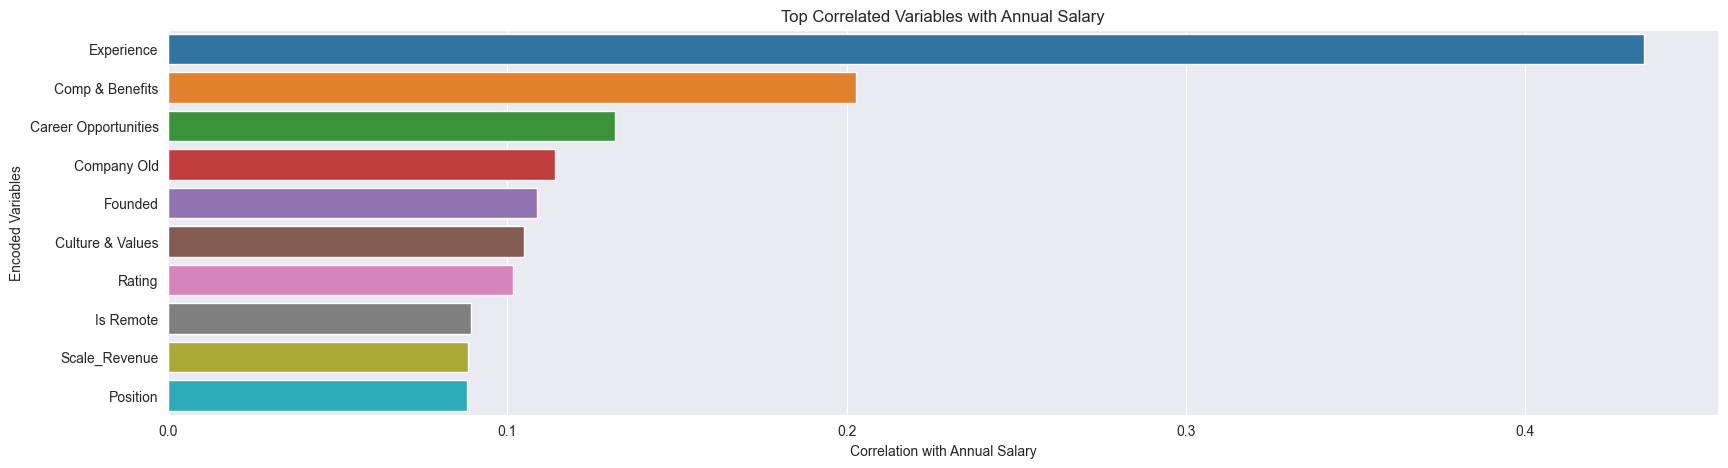

In [164]:
df_copy = dataBase.copy()
correlation_matrix = df_copy.corr()

predict = 'Annual Salary'

salary_correlations = correlation_matrix[predict].drop(predict)

sorted_correlations = salary_correlations.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 5))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.xlabel(f"Correlation with {predict}")
plt.ylabel('Encoded Variables')
plt.title(f"Top Correlated Variables with {predict}")
plt.show()


# Checking for outliers before cleaning


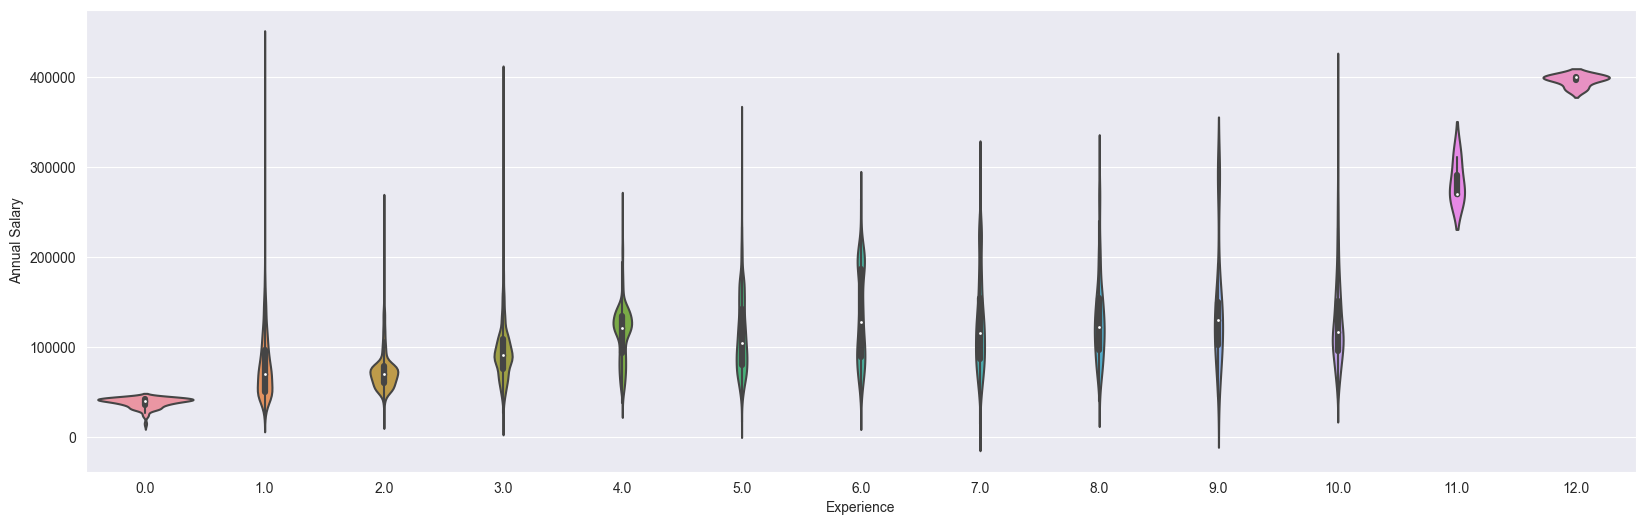

In [165]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Experience',y='Annual Salary', data=df_copy)
plt.show()


# Cleaning the outliers from top and bottom...


# Checking for Outliers after cleaning

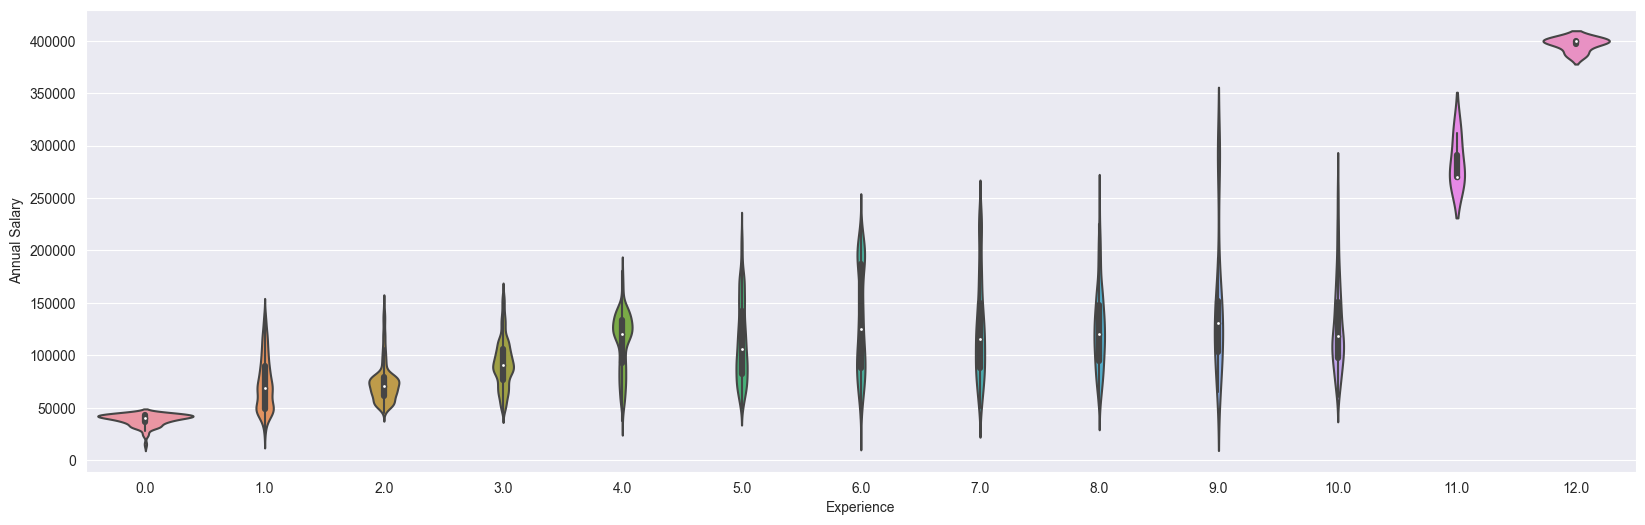

In [51]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Experience',y='Annual Salary', data=df_copy)
plt.show()


### Demand of experience

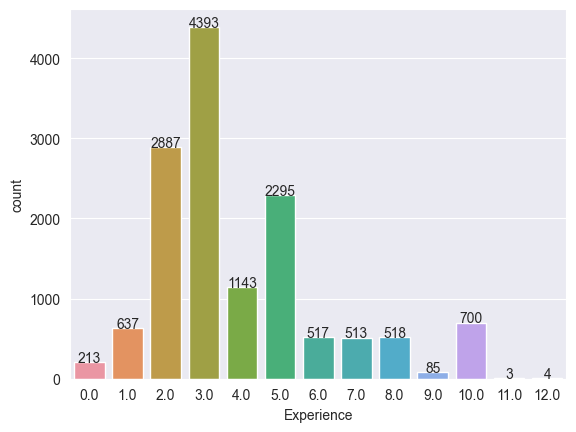

In [166]:
ax = sns.countplot(x='Experience', data=df_copy)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+0.2,
            s = '{:.0f}'.format(height),
            ha = 'center')

plt.show()

# Correlation Analysis after Removing Outliers

### Now we can see the differences it has made
- We removed the outliers from the top edge first
- 'Annual Salary' correlation with 'Experience' changed from 0.435237 to 0.493218

In [52]:
df_copy.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_2260\2929771587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance,Scale_Company_Size,Scale_Revenue
Annual Salary,1.000000,0.504554,0.047428,0.110012,0.093707,0.097408,-0.094558,0.099998,0.118613,0.188232,0.094367,0.070198,0.070159,0.063775,0.092768
Experience,0.504554,1.000000,0.115928,0.172991,0.053217,0.063758,-0.066114,0.040468,0.073353,0.105709,0.055703,0.054691,0.050006,0.015914,0.023999
Education,0.047428,0.115928,1.000000,0.295804,0.007573,0.027587,-0.040422,-0.052697,0.012697,0.008838,0.013070,0.020535,0.012525,-0.045086,-0.015071
Position,0.110012,0.172991,0.295804,1.000000,-0.038001,-0.001604,0.024952,0.090552,-0.048889,-0.018397,-0.007536,-0.050321,-0.012663,0.054653,0.061290
Rating,0.093707,0.053217,0.007573,-0.038001,1.000000,0.028629,-0.033825,0.005669,0.800865,0.729986,0.856665,0.840164,0.744377,-0.088396,-0.072008
Is Remote,0.097408,0.063758,0.027587,-0.001604,0.028629,1.000000,-0.089354,-0.104061,0.036245,0.031382,0.025575,0.050186,0.042211,-0.087998,-0.061912
Company Old,-0.094558,-0.066114,-0.040422,0.024952,-0.033825,-0.089354,1.000000,-0.037213,-0.059196,-0.089601,-0.062437,-0.100270,-0.081185,0.463323,0.302014
Founded,0.099998,0.040468,-0.052697,0.090552,0.005669,-0.104061,-0.037213,1.000000,0.023682,0.060517,0.022275,-0.038071,-0.019751,-0.023205,-0.009415
Career Opportunities,0.118613,0.073353,0.012697,-0.048889,0.800865,0.036245,-0.059196,0.023682,1.000000,0.766849,0.832205,0.850760,0.670004,-0.082289,-0.061096
Comp & Benefits,0.188232,0.105709,0.008838,-0.018397,0.729986,0.031382,-0.089601,0.060517,0.766849,1.000000,0.738945,0.720866,0.633642,-0.050972,0.001021


### Now we can see the differences it has made
- We removed the outliers from the bottom
- 'Annual Salary' correlation with 'Experience' changed from 0.493218 to 0.504554


# Correlation Analysis for Categorical Features

## Approach:
In this section, we will follow these steps:
1. We will encode the categorical features using an appropriate encoding technique, such as one-hot encoding or label encoding.
2. We will calculate the correlation between the encoded categorical features and the 'Annual Salary' variable using an appropriate measure, such as Cramer's V or correlation ratio.
3. We will visualize the correlation results using appropriate plots, such as stacked bar charts or heatmaps, to provide a clear understanding of the relationships.


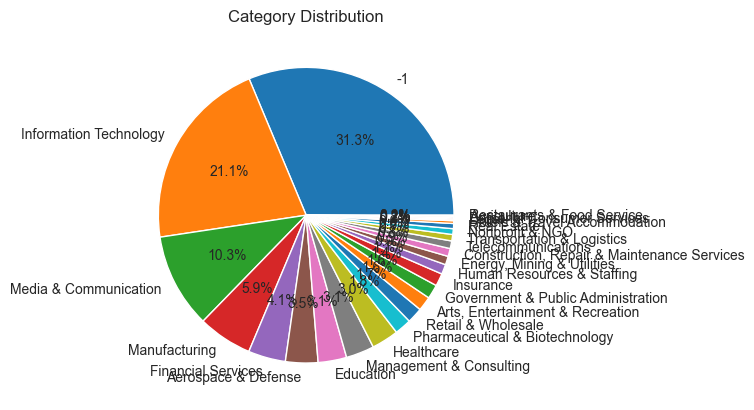

In [216]:
counts = df_copy['Sector'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title('Category Distribution')
plt.show()

# Removing '-1' Values

In [217]:
df_copy = df_copy[df_copy['Sector'] != '-1']
print(df_copy.shape)

(9112, 25)


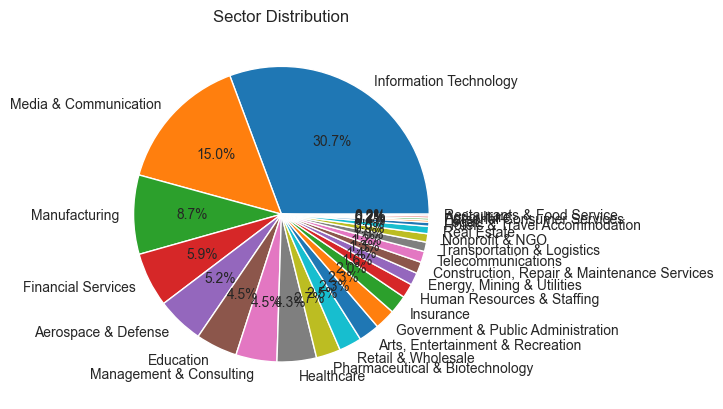

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\992634648.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Sector', y='Annual Salary', data=df_copy, ci=None)


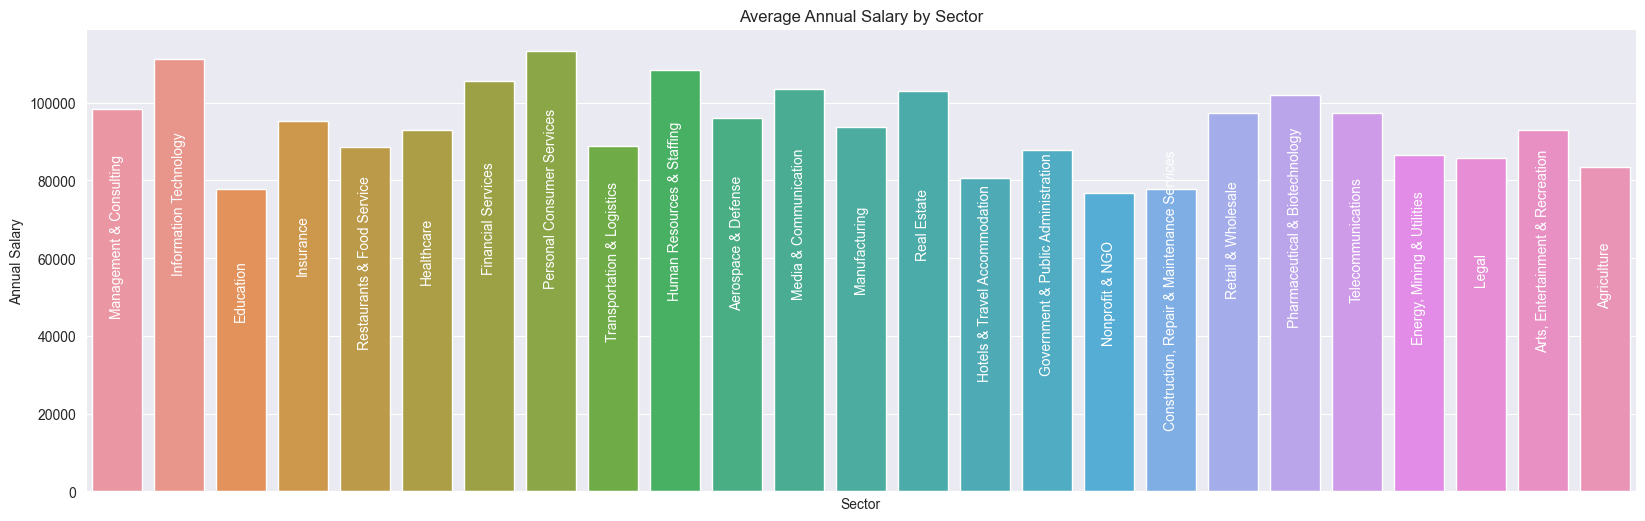

In [218]:
counts = df_copy['Sector'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title('Sector Distribution')
plt.show()


plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Sector', y='Annual Salary', data=df_copy, ci=None)

# Get the x-tick labels
x_labels = barplot.get_xticklabels()

for bar, label in zip(barplot.patches, x_labels):
    barplot.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() - bar.get_height()/3,  # Adjust as needed
                 label.get_text(),
                 ha='center',
                 va='center',
                 color='white',
                 rotation='vertical')  # Rotate text

plt.title("Average Annual Salary by Sector")
plt.xticks([])  # this removes x-label names
plt.show()



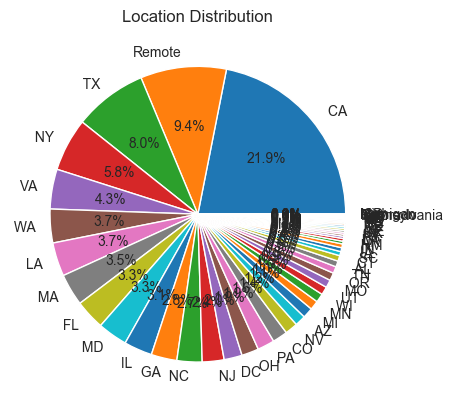

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\1607893056.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Location', y='Annual Salary', data=df_copy, ci=None)


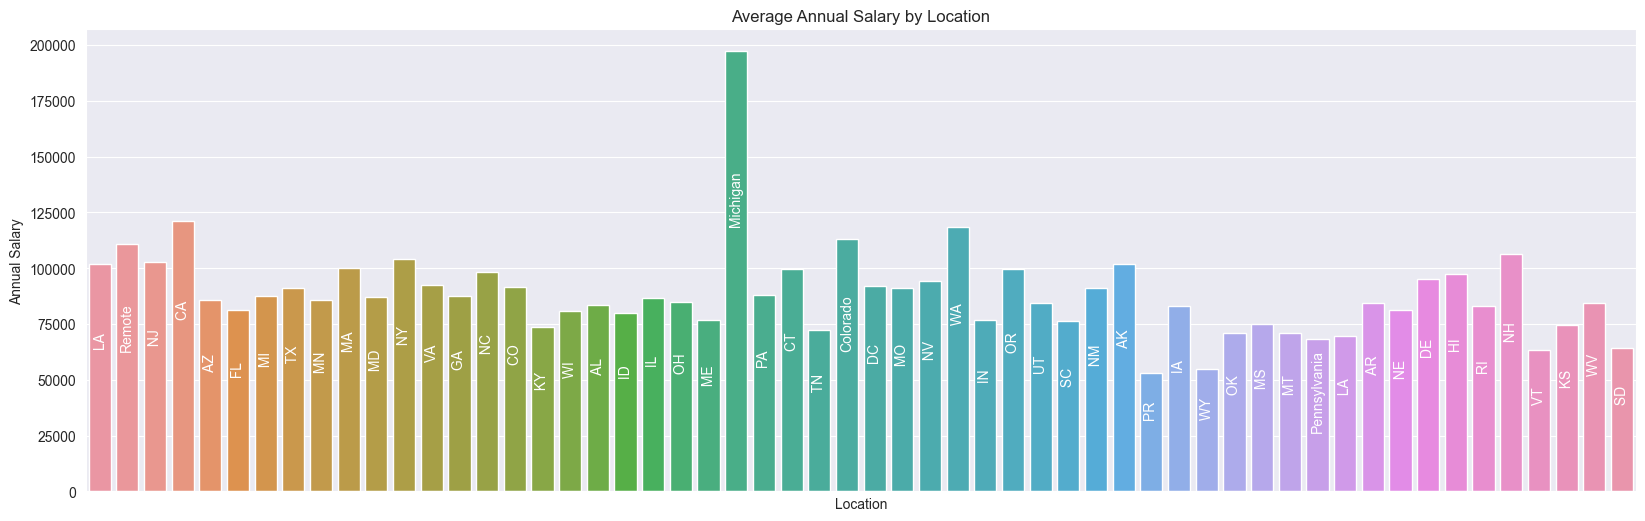

In [220]:
counts = df_copy['Location'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title('Location Distribution')
plt.show()



plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Location', y='Annual Salary', data=df_copy, ci=None)

# Get the x-tick labels
x_labels = barplot.get_xticklabels()

for bar, label in zip(barplot.patches, x_labels):
    barplot.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() - bar.get_height()/3,  # Adjust as needed
                 label.get_text(),
                 ha='center',
                 va='center',
                 color='white',
                 rotation='vertical')  # Rotate text

plt.title("Average Annual Salary by Location")
plt.xticks([])  # this removes x-label names
plt.show()



In [221]:
count = (df_copy['Location'] == 'Michigan').sum()
print(count)

1


In [222]:
df_copy = df_copy[df_copy['Location'] != 'Michigan']


### On the upper pie
'CA' is the leading with most jobs.

### On the lower chart
'Michigan' is above all, but there is only 1 job, it is an outlier and we remove it.
We can see that there is no linear correlation with 'Annual Salary'

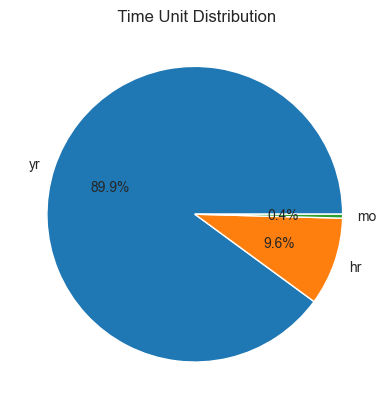

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\3986227400.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Time Unit', y='Annual Salary', data=df_copy, ci=None)


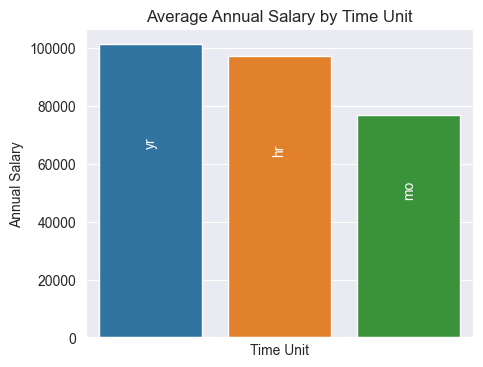

In [223]:
counts = df_copy['Time Unit'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title(' Time Unit Distribution')
plt.show()



plt.figure(figsize=(5, 4))
barplot = sns.barplot(x='Time Unit', y='Annual Salary', data=df_copy, ci=None)

# Get the x-tick labels
x_labels = barplot.get_xticklabels()

for bar, label in zip(barplot.patches, x_labels):
    barplot.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() - bar.get_height()/3,  # Adjust as needed
                 label.get_text(),
                 ha='center',
                 va='center',
                 color='white',
                 rotation='vertical')  # Rotate text

plt.title("Average Annual Salary by Time Unit")
plt.xticks([])  # this removes x-label names
plt.show()

### On the upper pie
'yr' is the leading with most jobs -> most of the jobs pay a yearly salary

### On the lower chart
We can see that there is no linear correlation with 'Annual Salary'

In [224]:
df_copy.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2929771587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance,Scale_Company_Size,Scale_Revenue
Annual Salary,1.000000,0.510176,0.062607,0.124211,0.121640,0.083971,-0.118317,0.118317,0.145183,0.240817,0.121743,0.081882,0.081294,0.070828,0.105938
Experience,0.510176,1.000000,0.128679,0.199326,0.057976,0.052669,-0.084665,0.084665,0.068816,0.115396,0.059278,0.049896,0.055542,0.018436,0.033235
Education,0.062607,0.128679,1.000000,0.328012,0.004668,0.011638,-0.046670,0.046670,0.010747,0.011721,0.010618,0.014822,0.008151,-0.052871,-0.015078
Position,0.124211,0.199326,0.328012,1.000000,-0.056870,0.004711,0.032206,-0.032206,-0.071254,-0.039985,-0.024730,-0.069349,-0.022148,0.067168,0.075063
Rating,0.121640,0.057976,0.004668,-0.056870,1.000000,0.004393,-0.050378,0.050378,0.867187,0.751106,0.914148,0.906125,0.790016,-0.125938,-0.101162
Is Remote,0.083971,0.052669,0.011638,0.004711,0.004393,1.000000,-0.122556,0.122556,0.016123,0.021169,0.003846,0.038273,0.034144,-0.120569,-0.088207
Company Old,-0.118317,-0.084665,-0.046670,0.032206,-0.050378,-0.122556,1.000000,-1.000000,-0.088543,-0.126743,-0.084495,-0.136018,-0.107269,0.460966,0.298058
Founded,0.118317,0.084665,0.046670,-0.032206,0.050378,0.122556,-1.000000,1.000000,0.088543,0.126743,0.084495,0.136018,0.107269,-0.460966,-0.298058
Career Opportunities,0.145183,0.068816,0.010747,-0.071254,0.867187,0.016123,-0.088543,0.088543,1.000000,0.765961,0.850118,0.870680,0.685026,-0.118784,-0.086142
Comp & Benefits,0.240817,0.115396,0.011721,-0.039985,0.751106,0.021169,-0.126743,0.126743,0.765961,1.000000,0.723101,0.711169,0.596759,-0.074715,0.000664


 After removing jobs with the missing values we can see that the correlation between 'Annual Salary' and 'Experience' & 'Comp & Benefits' has grown up


# In this section we want to transfer the categorical features to binary to use them in the model
- For this transfer, we use 'One Hot Encoder'
- There are two Dataframes, and we will try them both for checking which is the best Dataframe

In [225]:
one_hot_full_features = pd.get_dummies(df_copy[['Sector', 'Industry','Time Unit','Location']])
one_hot_half_feature = pd.get_dummies(df_copy[['Sector','Location']])

# Drop columns 'Sector' and 'Industry' as they are now encoded
df_full_feature = df_copy.drop(['Sector', 'Industry','Time Unit','Location'], axis=1)
df_half_feature = df_copy.drop(['Sector', 'Location'], axis=1)

# Join the encoded DataFrame
df_full_feature = df_full_feature.join(one_hot_full_features)
df_half_feature = df_half_feature.join(one_hot_half_feature)

print("full features:", df_full_feature.shape)
print("half features :" , df_half_feature.shape)


full features: (9111, 208)
half features : (9111, 103)


Removing all Non Numeric Columns

In [226]:
df_numeric_full_features = df_full_feature.select_dtypes(include='number')
df_numeric_half_features = df_half_feature.select_dtypes(include='number')
print("full features:", df_numeric_full_features.shape)
print("half features :" , df_numeric_half_features.shape)

full features: (9111, 202)
half features : (9111, 95)


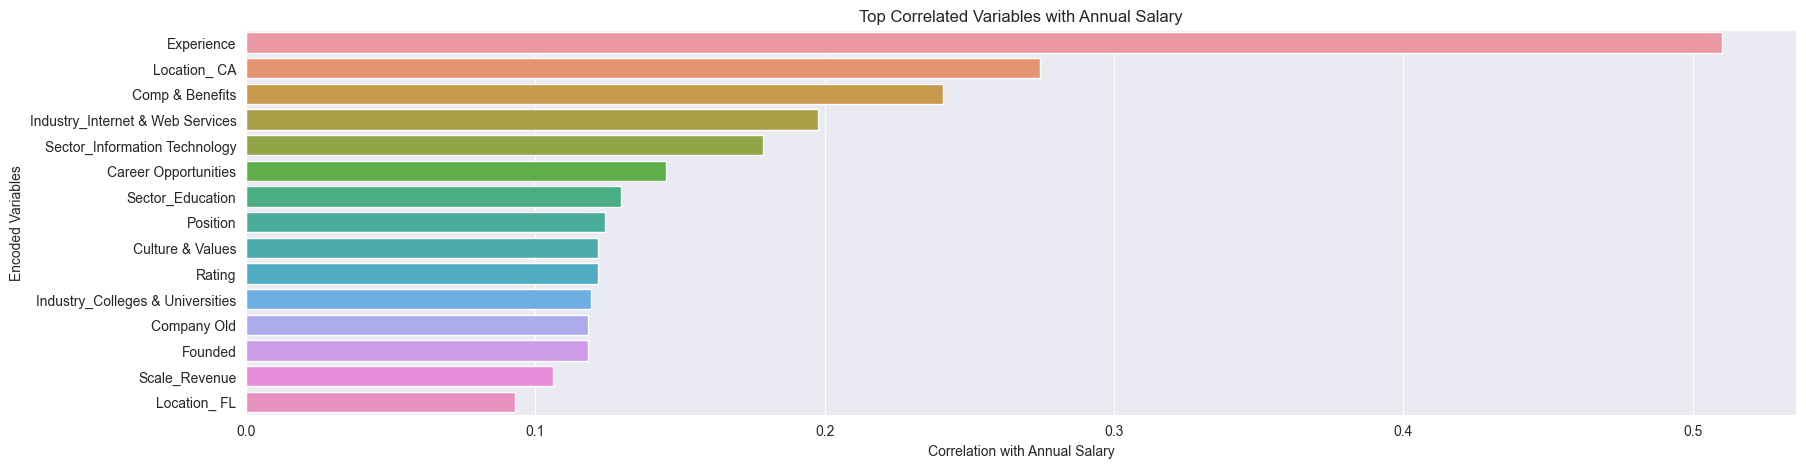

In [230]:
correlation_matrix = df_numeric_full_features.corr()

predict = 'Annual Salary'

salary_correlations = correlation_matrix[predict].drop(predict)

sorted_correlations = salary_correlations.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(20, 5))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.xlabel(f"Correlation with {predict}")
plt.ylabel('Encoded Variables')
plt.title(f"Top Correlated Variables with {predict}")
plt.show()

# Step 5 - Machine Learning Process: Building and Training a Linear Regression Model with Full Features and Half Features
## _Purpose_:
### The purpose of this step is to apply machine learning techniques by building and training a Linear Regression model using a dataframe that includes all the relevant features. By utilizing the power of Linear Regression, we aim to create a predictive model that can estimate the 'Annual Salary' based on the available features.

## _Approach_:
## In this section, we will follow these steps:
### 1. Split the dataset into training and testing subsets to evaluate the model's performance.
### 2. Build a Linear Regression model using the training data, incorporating all available features.
### 3. Train the model on the training data to estimate the regression coefficients and intercept that best fit the data.
### 4. Validate the model's performance on the testing data to assess its ability to generalize well to unseen data.
### 5. Analyze the coefficients of the Linear Regression model to understand the relative importance and impact of each feature on predicting the 'Annual Salary.'

###  Model with full features

In [93]:
start_time = time.time()

X = df_numeric_full_features.drop(['Annual Salary','Education'], axis=1)
y = df_numeric_full_features["Annual Salary"]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
linear_full_features = linear_model.LinearRegression()
linear_full_features.fit(x_train, y_train)
counter_of_negative_values_full = 0
best_full = 0.0
for _ in range(10000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
    linear_full_features = linear_model.LinearRegression()
    linear_full_features.fit(x_train, y_train)
    accuracy = linear_full_features.score(x_test, y_test)
    if accuracy < 0:
        counter_of_negative_values_full += 1

    print(accuracy)

    if accuracy > best_full:
        best_full = accuracy
        print(f"best = {best_full}")
        # Saving the best model
        best_full_model = linear_full_features


print(f"best of all-full :{best_full}")

end_time = time.time()
execution_time_full = end_time - start_time

print(f"Time taken to run the code: {execution_time_full:.2f} seconds")


0.44876271800315004
best = 0.44876271800315004
-273365533104.60513
-7101234722808.516
0.46077783219314017
best = 0.46077783219314017
-521145586231.79694
-754171253821.1228
-1155078526182.968
0.4401021393913882
0.41773261185976285
-466490141437.3874
0.4111638110573138
-1091632581903.3221
-123486496.58278574
-1421386566.2916338
-57464558.29051547
0.41102141717683127
0.44228051390192435
-48000859307274.73
-2115427485961417.0
-670121873768.023
-242815320.9372658
-34240198026.22268
-4316369769.873949
-1570200223335.9858
-218722920565.39304
0.44719033247323003
-383679992584.86237
-573105760126.8374
0.4190955071742687
0.462783265847733
best = 0.462783265847733
0.44421000569941915
0.38451920956005226
-1592808283856.6365
-70286557361.11671
0.462518934361414
-129728086264.12663
0.43317537248301374
-513533904678.2178
-2393360252.715667
-15878178815.154514
-274406934040531.3
-176276976284181.06
0.3785669965017019
-712949357478.322
-60928377890.30619
-2087177370756.7783
-14726373074.09026
-41913270

### Model with half features


In [94]:
start_time = time.time()

X = df_numeric_half_features.drop(['Annual Salary','Education'], axis=1)
y = df_numeric_half_features["Annual Salary"]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
linear_half_features = linear_model.LinearRegression()
linear_half_features.fit(x_train, y_train)
counter_of_negative_values_half = 0
best_half = 0.0
for _ in range(10000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
    linear_half_features = linear_model.LinearRegression()
    linear_half_features.fit(x_train, y_train)
    accuracy = linear_half_features.score(x_test, y_test)
    if accuracy < 0:
        counter_of_negative_values_half += 1

    print(accuracy)

    if accuracy > best_half:
        best_half = accuracy
        print(f"best = {best_half}")
        # Saving the best model
        best_half_model = linear_half_features


print(f"best of all-half ={best_half}")


end_time = time.time()
execution_time_half = end_time - start_time

print(f"Time taken to run the code: {execution_time_half:.2f} seconds")

0.4347193940323385
best = 0.4347193940323385
0.42054069650646153
0.43357613928958394
0.39984977346001205
0.4243629070298638
0.3990111508122707
0.40894958179615026
0.4050884074647526
0.4447396707864688
best = 0.4447396707864688
0.39662131231493536
0.41862083299316577
0.3796239117583099
0.42140622743087897
0.42259053629318166
0.40347218759481296
0.3717856639955881
0.3969949001894547
0.4379569552449053
0.4193852274634161
0.3344168490963242
0.4133858432917036
0.4209763949380082
0.39855360074234136
0.4530604089082588
best = 0.4530604089082588
0.43006363784695856
0.3985122033660047
0.409705139158105
0.37435074028925674
0.4338744298193241
0.4289152610370689
0.4166040590181048
0.45644237865256587
best = 0.45644237865256587
0.4122319149491338
0.4083206508559627
0.45919216697299625
best = 0.45919216697299625
0.43764872780589503
0.4031076725621723
0.4479317920307193
0.42184101970411314
0.4294832846613351
0.41277307448288747
0.45281022257716963
0.43840358979467997
0.3483332512606835
0.377826924794

### Compare within the two models


In [96]:
print(f"Best of full features: {best_full}")
print(f"Number of negative values: {counter_of_negative_values_full}")
print(f"Percentage: {(counter_of_negative_values_full/100000)*1000}")
print("")
print(f"Best of half features: {best_half}")
print(f"Number of negative values: {counter_of_negative_values_half}")
print(f"Percentage: {(counter_of_negative_values_half/100000)*1000}")
percentage_increase = ((execution_time_full - execution_time_half) / execution_time_half) * 100
print(f"Full feature model took: {percentage_increase:.2f}% more time to run than half feature model")

Best of full features: 0.5025871587692621
Number of negative values: 6273
Percentage: 62.73

Best of half features: 0.5127723856067705
Number of negative values: 117
Percentage: 1.17
Full feature model took: 301.09% more time to run than half feature model


### The second model, employing only half the features, outperforms the first one for the following reasons:
- Its predictive accuracy remains almost identical.
- It demonstrates a significant decrease in negative values.
- Its construction and training process are more time-efficient.

### Saving the best model into a pickle file

In [243]:
with open("best_model.pickle", "wb") as f:
    pickle.dump(linear_half_features,f)

### Loading the best model


In [248]:
pickle_in = open("best_model.pickle", "rb")
linear = pickle.load(pickle_in)

### Testing the loaded model

In [91]:
pred = linear.predict(x_test)

accuracy = linear.score(x_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4655536248062213


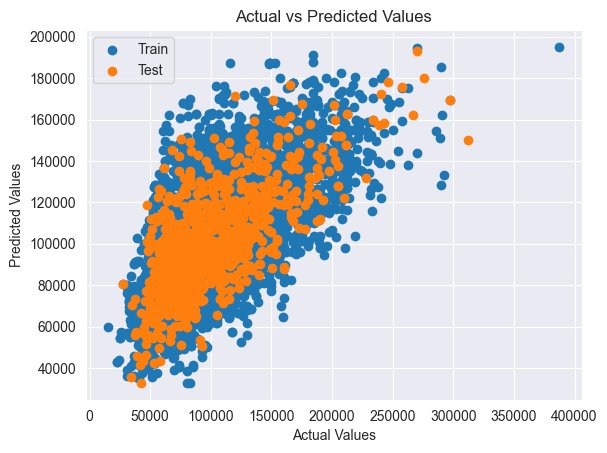

In [92]:
y_train_pred = linear.predict(x_train)
y_test_pred = linear.predict(x_test)

plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


# Step 6 - Conclusion

## The salary in the global high-tech market is not consistent and is not solely dependent on a specific factor or a combination of specific factors. Our initial intuition that years of experience would have a significant impact on an employee's salary was not necessarily accurate.

## The global high-tech market is highly dynamic, and employees who have acquired experience in specific programming languages over the years may find themselves in less demand as new technologies emerge that can easily replace their roles. On the other hand, we recognize that new employees with extensive experience in sought-after programming languages can bring significant value.

## Furthermore, contrary to our initial intuitive stance, our research revealed that the defining characteristic of educational level has an influence that accounts for approximately half of the impact of location. For example, a computer science Ph.D. from India or Bangladesh may earn, on average, two-thirds of the salary of an employee with a moderate education level from California.

## The most significant fluctuations in the global market are driven by the breakthrough of innovative technologies that disrupt the status quo and change the rules of the game. For instance, the emergence of Artificial Intelligence (AI) and GPT has created tremendous demand for experienced programmers.

## Overall, our research demonstrates that the global high-tech market is complex and influenced by a variety of factors beyond just years of experience and educational background. Staying up to date with emerging technologies and continuously honing relevant skills is crucial for professionals in this field to navigate the ever-changing landscape successfully.